<a href="https://colab.research.google.com/github/Reinaldo0/ProjetoA3-BigData/blob/main/BigData_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

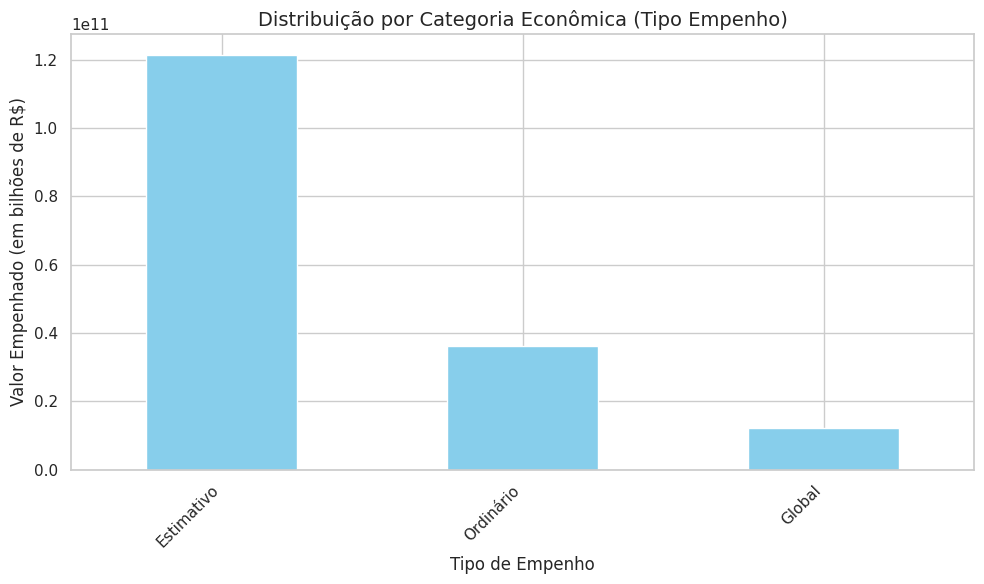

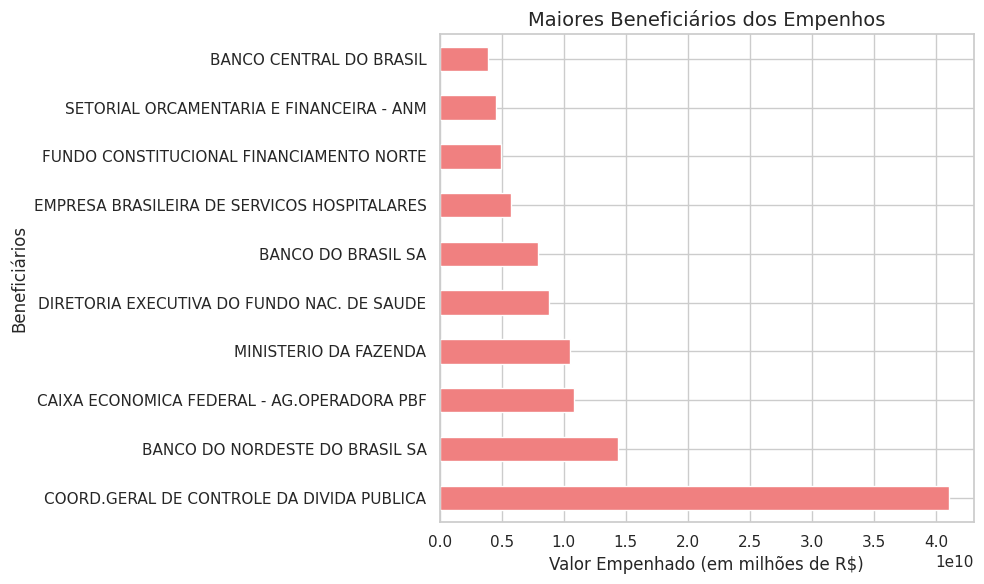

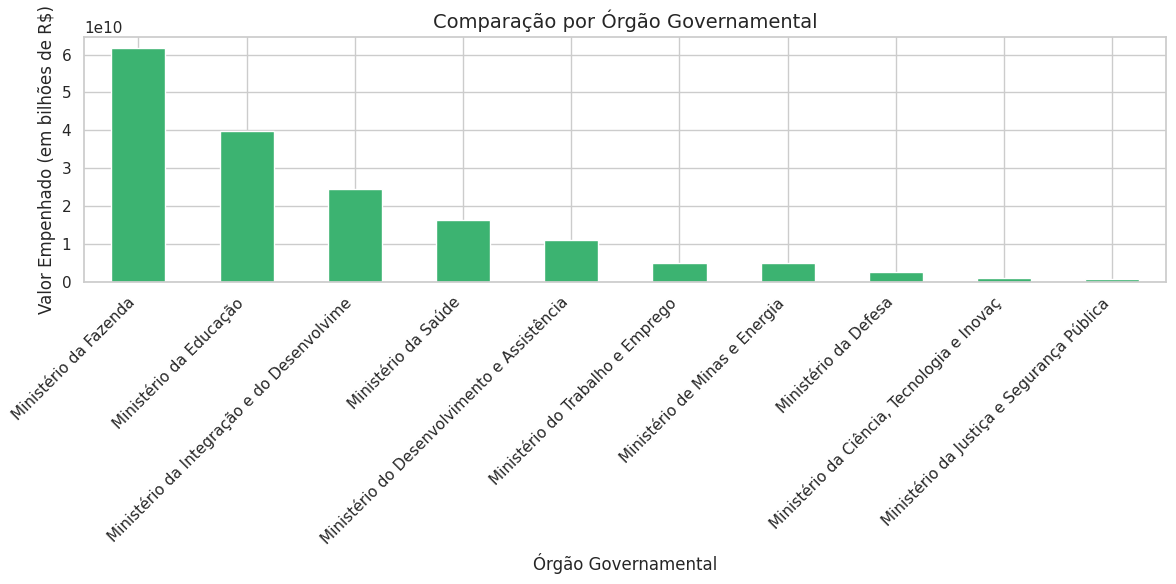

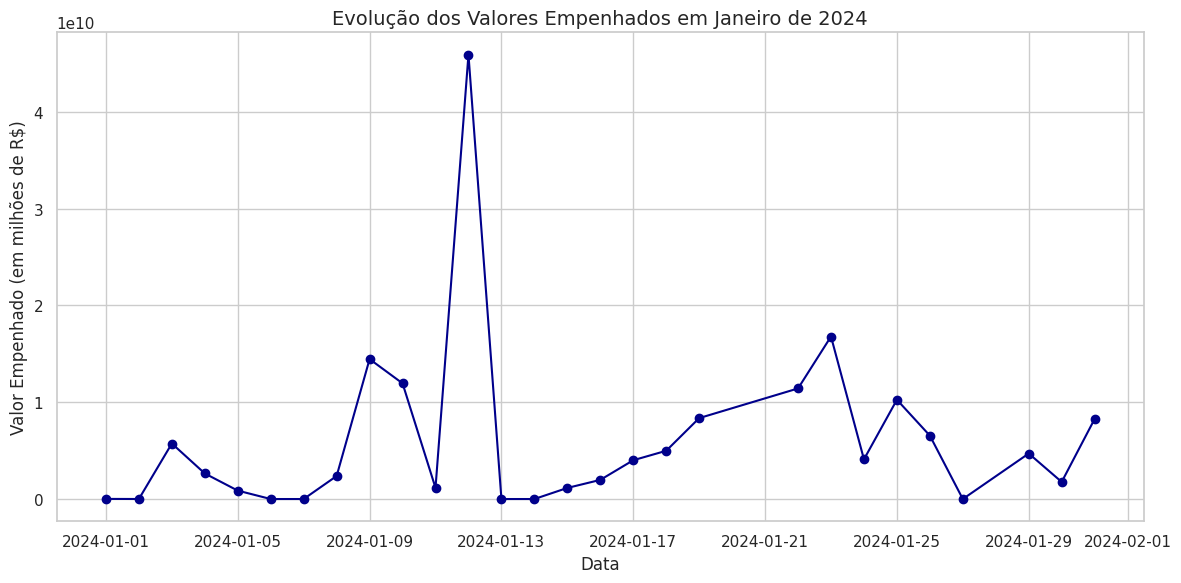

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configurar estilo visual global para os gráficos
sns.set_theme(style="whitegrid")

def load_data(file_path):
    """
    Carrega os dados de um arquivo Excel.
    """
    return pd.read_excel(file_path)

def plot_tipo_empenho(df):
    """
    Gera um gráfico de barras que mostra a distribuição dos valores empenhados
    por tipo de empenho (categoria econômica).
    """
    # Agrupar e somar os valores empenhados por tipo de empenho
    tipo_empenho_data = df.groupby("Tipo Empenho")["Valor Original do Empenho"].sum().sort_values(ascending=False)

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    tipo_empenho_data.plot(kind="bar", color="skyblue")
    plt.title("Distribuição por Categoria Econômica (Tipo Empenho)", fontsize=14)
    plt.xlabel("Tipo de Empenho", fontsize=12)
    plt.ylabel("Valor Empenhado (em bilhões de R$)", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def plot_maiores_beneficiarios(df):
    """
    Gera um gráfico de barras horizontais que mostra os 10 maiores beneficiários
    dos valores empenhados.
    """
    # Agrupar e somar os valores por beneficiário, selecionando os 10 maiores para um load mais rapido / Casso queria visualizar todos os dados retire o .head
    beneficiarios = df.groupby("Favorecido")["Valor Original do Empenho"].sum().sort_values(ascending=False).head(10)

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    beneficiarios.plot(kind="barh", color="lightcoral")
    plt.title("Maiores Beneficiários dos Empenhos", fontsize=14)
    plt.xlabel("Valor Empenhado (em milhões de R$)", fontsize=12)
    plt.ylabel("Beneficiários", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_orgaos(df):
    """
    Gera um gráfico de barras que mostra a comparação dos valores empenhados
    pelos 10 principais órgãos governamentais.
    """
    # Agrupar e somar os valores por órgão governamental, selecionando os 10 maiores para um load mais rapido / Casso queria visualizar todos os dados retire o .head
    orgaos = df.groupby("Órgão Superior")["Valor Original do Empenho"].sum().sort_values(ascending=False).head(10)

    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    orgaos.plot(kind="bar", color="mediumseagreen")
    plt.title("Comparação por Órgão Governamental", fontsize=14)
    plt.xlabel("Órgão Governamental", fontsize=12)
    plt.ylabel("Valor Empenhado (em bilhões de R$)", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def plot_evolucao_empenhos(df):
    """
    Gera um gráfico de linha que mostra a evolução dos valores empenhados
    ao longo do mês.
    """
    # Converter a coluna de data para o formato datetime (caso ainda não esteja)
    df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

    # Agrupar e somar os valores por data
    evolucao = df.groupby("Data Emissão")["Valor Original do Empenho"].sum()

    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(evolucao.index, evolucao.values, marker="o", color="darkblue")
    plt.title("Evolução dos Valores Empenhados em Janeiro de 2024", fontsize=14)
    plt.xlabel("Data", fontsize=12)
    plt.ylabel("Valor Empenhado (em milhões de R$)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Bloco principal para executar o script
if __name__ == "__main__":
    """
    Este bloco será executado apenas se o script for rodado diretamente,
    permitindo carregar os dados e gerar os gráficos.
    """
    # Substitua pelo caminho correto do seu arquivo Excel
    file_path = "202401_Empenhos.xlsx"

    # Carregar os dados
    df = load_data(file_path)

    # Gerar os gráficos
    plot_tipo_empenho(df)
    plot_maiores_beneficiarios(df)
    plot_orgaos(df)
    plot_evolucao_empenhos(df)
